# Homework 1-4: Linear regression with Yelp votes

## Introduction

This assignment uses a small subset of the data from **Kaggle**'s [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. 
  Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is <font color=red>a review of a particular business by a particular user.</font>
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) 
  In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. 
  All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. 
  In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
import sys
sys.executable

'/opt/anaconda3/bin/python'

In [2]:
# 导入必要的包
import numpy as np

## Task 1

Read `yelp.csv` into a DataFrame.

In [3]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. 

This involves：
* reading the data into Python
* decoding the JSON
* converting it to a DataFrame
* adding individual columns for each of the vote types.

In [4]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('yelp.json', 'r') as f:
    data = [json.loads(row) for row in f]

In [5]:
# show the first review
data[0]

{'votes': {'funny': 0, 'useful': 5, 'cool': 2},
 'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q',
 'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
 'stars': 5,
 'date': '2011-01-26',
 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It wa

In [6]:
# convert the list of dictionaries to a DataFrame
data_pd = pd.DataFrame(data)
data_pd.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [7]:
# add DataFrame columns for cool, useful, and funny
data_votes = data_pd["votes"]
cool_list = []
useful_list = []
funny_list = []

for temp in data_votes:
#     print(temp) 
    temp_funny = temp['funny']
    temp_useful = temp['useful']
    temp_cool = temp['cool']
    
    funny_list.append(temp_funny)
    useful_list.append(temp_useful)
    cool_list.append(temp_cool)

data_pd['cool'] = cool_list
data_pd['useful'] = useful_list
data_pd['funny'] = funny_list    

In [8]:
# drop the votes column and then display the head
data_pd = data_pd.drop(columns = "votes")
data_pd.head()

,user_id,review_id,stars,date,text,type,business_id,cool,useful,funny
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,2,5,0
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,0,1,0
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,1,2,0
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0


## Task 2

Explore the relationship between each of the vote types (**cool** / **useful** / **funny**) and the **number of stars**.

In [9]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
# 将星星视为分类变量，并通过比较组的均值来寻找组之间的差异
stars = yelp["stars"]
cools = yelp["cool"]
usefuls = yelp["useful"]
funnys = yelp["funny"]


# 将其加入数组中
x = []
y = []
for i in range(len(stars)):
    x.append([cools[i], usefuls[i], funnys[i]])
    y.append(stars[i])

# 转换为 numpy
x = np.array(x)
y = np.array(y)

y_values = np.unique(y)
print("y 的可能取值: ", y_values) 

# 求各个 y 可能取值的均值
means = []
for i in y_values:
    index = np.where(y==i)
    temp_mean = x[index].mean(axis=0)
    means.append(temp_mean)
# print(means)

print("各个组的均值如下所示: ")
for i in range(len(means)):
    print(y_values[i], ": ", means[i]) 

y 的可能取值:  [1 2 3 4 5]
各个组的均值如下所示: 
1 :  [0.57676903 1.60480641 1.05607477]
2 :  [0.71952535 1.5631068  0.87594391]
3 :  [0.78850103 1.30663929 0.69472964]
4 :  [0.9546228  1.39591605 0.6704481 ]
5 :  [0.94426131 1.38178004 0.60863051]


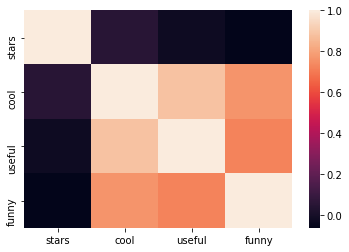

In [10]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr()) # 用于查找数据帧中所有列的成对相关性

In [11]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
# 如下所示

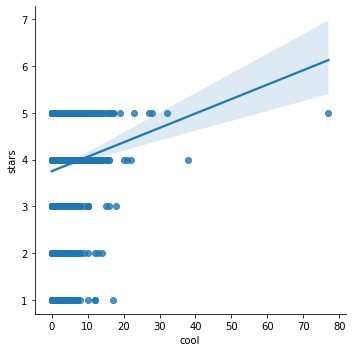

In [12]:
# cool
sns.lmplot(x="cool",y="stars",data=yelp)

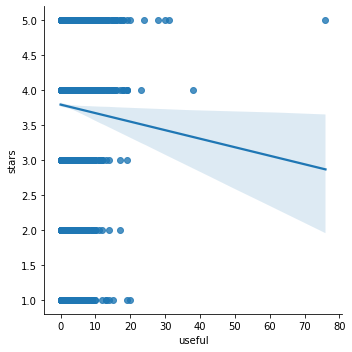

In [13]:
# useful
sns.lmplot(x="useful",y="stars",data=yelp)

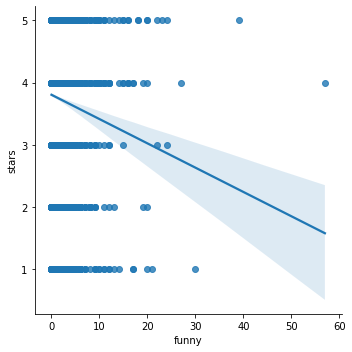

In [14]:
# funny
sns.lmplot(x="funny",y="stars",data=yelp)

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [15]:
# 将星星视为分类变量，并通过比较组的均值来寻找组之间的差异
stars = yelp["stars"]
cools = yelp["cool"]
usefuls = yelp["useful"]
funnys = yelp["funny"]


# 将其加入数组中
x = []
y = []
data_all = []
for i in range(len(stars)):
    x.append([cools[i], usefuls[i], funnys[i]])
    y.append(stars[i])
    data_all.append([cools[i], usefuls[i], funnys[i], stars[i]])

# 转换为 numpy
x = np.array(x)
y = np.array(y)
data_all = np.array(data_all)

## Task 4

Fit a linear regression model and interpret the coefficients. 

Do the coefficients make intuitive sense to you? 

Explore the Yelp website to see if you detect similar trends.

In [16]:
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model_linear = LinearRegression()

# 训练模型
model_linear.fit(x, y)

# 得到参数
print(model_linear.coef_)

[ 0.27435947 -0.14745239 -0.13567449]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. 

Does the RMSE make intuitive sense to you?

In [17]:
# from sklearn.cross_validation import train_test_split # 这个包早就不用了
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [18]:
best_rmse = 0

In [19]:
# define a function that accepts a list of features and returns testing RMSE
from sklearn.metrics import mean_squared_error

def test_RMSE(data_all):
    # 产生训练集和测试集
    train, test = train_test_split(data_all, test_size=0.3)
    
    train_x = train[:, 0:-1]
    train_y = train[:, -1]
    test_x  = test[:, 0:-1]
    test_y  = test[:,-1]
    
    # 训练模型
    model_linear = LinearRegression()
    model_linear.fit(train_x, train_y)
    predicts = model_linear.predict(test_x)
    
    # 计算 RMSE
    rmse = np.sqrt(mean_squared_error(test_y,predicts))
    
    return rmse

In [20]:
# calculate RMSE with all three features
rmse = test_RMSE(data_all)
print(rmse)

if rmse > best_rmse:
    best_rmse = rmse

1.1909189890038772


## Task 6

Try removing some of the features and see if the RMSE improves.

In [21]:
print("最初的 rmse: ", rmse)

# 删除一列 cool/useful/funny
data_remove_cool = np.delete(data_all, 0, axis=1)
rmse_temp = test_RMSE(data_remove_cool)
print("删除一列 cool 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp

data_remove_useful = np.delete(data_all, 1, axis=1)
rmse_temp = test_RMSE(data_remove_useful)
print("删除一列 useful 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp
    
    
data_remove_funny = np.delete(data_all, 2, axis=1)
rmse_temp = test_RMSE(data_remove_funny)
print("删除一列 funny 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp

最初的 rmse:  1.1909189890038772
删除一列 cool 后的 rmse:  1.2111066022166201
删除一列 useful 后的 rmse:  1.1878787364405292
删除一列 funny 后的 rmse:  1.191389328469796


In [22]:
print("最初的 rmse: ", rmse)

# 保留一列
data_only_cool = np.delete(data_all, [1,2], axis=1)
rmse_temp = test_RMSE(data_only_cool)
print("仅保留一列 cool 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp

data_only_useful = np.delete(data_all, [0,2], axis=1)
rmse_temp = test_RMSE(data_only_useful)
print("仅保留一列 useful 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp

data_only_funny = np.delete(data_all, [0,1], axis=1)
rmse_temp = test_RMSE(data_only_funny)
print("仅保留一列 funny 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp

最初的 rmse:  1.1909189890038772
仅保留一列 cool 后的 rmse:  1.1895405592125092
仅保留一列 useful 后的 rmse:  1.2169389842817728
仅保留一列 funny 后的 rmse:  1.2073584756738518


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. 

Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [23]:
# new feature: text 的字数
texts = yelp["text"]

texts_number = []

for temp in texts:
#     str_list = temp.split(" ")
    temp_length = len(temp)
    texts_number.append(temp_length)
texts_number = np.array(temp_length)

In [24]:
data_all_number = np.insert(data_all, 0, values=texts_number, axis=1) 
rmse_temp = test_RMSE(data_all_number)
print("添加新数据 text_number 后的 rmse: ", rmse_temp)

添加新数据 text_number 后的 rmse:  1.179946175449817


In [25]:
data_remove_useful = np.delete(data_all, 1, axis=1)
data_all_number = np.insert(data_remove_useful, 0, values=texts_number, axis=1)
rmse_temp = test_RMSE(data_all_number)
print("添加新数据 text_number、删除 useful 后的 rmse: ", rmse_temp)

if rmse_temp < best_rmse:
    best_rmse = rmse_temp

添加新数据 text_number、删除 useful 后的 rmse:  1.1787994206515755


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [26]:
# 仅预测平均响应值的模型
# 产生训练集和测试集
train, test = train_test_split(data_all, test_size=0.3)

train_y = train[:, -1]
test_y  = test[:,-1]

# 训练模型
mean_y = train_y.mean()
predicts = mean_y * np.ones(len(test_y))

# 计算 RMSE
rmse_mean = np.sqrt(mean_squared_error(test_y,predicts))
print("用平均值预测的 rmse: ", rmse_mean)

用平均值预测的 rmse:  1.2121782047207417


In [27]:
# best 模型的 rmse
print("best 模型的 rmse 值:", best_rmse)

best 模型的 rmse 值: 1.1787994206515755
